We create a reaction with multiple substrates and multiple products e.g. $a + 2b \leftrightarrow 2c + d$. This is actually quite straight-forward extention of previous examples. 

Let's setup the environment.

In [1]:
%matplotlib inline
import moose
import matplotlib.pyplot as plt
import numpy

As usual, the program contains following flow: 

- Initialize compartment
- Initialize reactants and products using `moose.Pool`
- Initialize reaction, setup rate constant and add substrate and products.
- [Optional] For better accuracy, decrease the step size.
- Setup recorders to get the data.
- Run and plot.

In [2]:
# initialize compartment
a = moose.CubeMesh('/compartment')
a.volume = 1e-15

In [3]:
pools = []
for i in ['a', 'b','c', 'd']:
    pools.append(moose.Pool('/compartment/%s'%i))
a, b, c, d = pools    

In [4]:
# initialize substrate concentrations. SI units.
a.concInit = 10.0
b.concInit = 13.0 
c.concInit = 4.0
d.concInit = 0.0

In [5]:
# setup reaction
reac = moose.Reac('/compartment/reac')
reac.Kf = 1.0
reac.Kb = 1.0
reac.connect('sub', a, 'reac')
reac.connect('sub', b, 'reac')
reac.connect('sub', b, 'reac')   # because of 2b
reac.connect('prd', c, 'reac')
reac.connect('prd', c, 'reac')  # because of 2c
reac.connect('prd', d, 'reac')

<moose.SingleMsg: id=5, dataIndex=5, path=/Msgs[0]/singleMsg[5]>

Species $a$ and $b$ are substrates to this reaction while $c$ and $d$ are products. All products are initialized to 0.0 $mole/m^{-3}$ by default.

Now, lets add recorders (`moose.Table`).

In [6]:
tables = []
for t in ['a','b','c','d']:
    tab = moose.Table2('/%s'%t)
    tables.append(tab)
tabA, tabB, tabC, tabD = tables
tabA.connect('requestOut', a, 'getConc')
tabB.connect('requestOut', b, 'getConc')
tabC.connect('requestOut', c, 'getConc')
tabD.connect('requestOut', d, 'getConc')

<moose.SingleMsg: id=5, dataIndex=9, path=/Msgs[0]/singleMsg[9]>

Now run the simulation of 10 seconds and plot the results. Don't forget to reduce the timestep of clocks responsible for chemical entities in MOOSE.

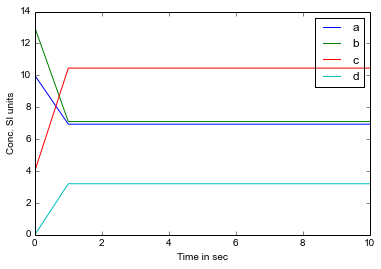

In [7]:
for i in range(10, 16):
    moose.setClock(i, 0.001)
    
moose.reinit()   # reinitialize moose
moose.start(10.0)
for tab in tables:
    t = numpy.linspace(0, 10.0, tab.vector.size)
    plt.plot(t, tab.vector, label=tab.name)
plt.legend()
plt.xlabel("Time in sec")
plt.ylabel("Conc. SI units")
plt.show()

At eqilibrium, concentration of reactants and products are shown above. 